In [49]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import richardsplot

In [109]:
df = pd.read_csv("RQQfigs.csv")

In [110]:
df

,col1,Name_1,SDSSName,RMS,PF,PF_err,IF,IF_err,S/N,Resolved,...,z,S(6)_t,pmt,S(6)_p,pmp,f_c,logL,i,I_2a,R
0,9,0847+2631,084755.63+263147.6,3.6,27.6,2.6,38.1,5.7,7.666667,1.0,...,0.282,16.8,5.0,16.8,5.0,1.000,21.58,17.662,-22.59,0.05
1,30,0944+3608,094427.99+360837.1,6.4,44.2,6.3,74.0,16.0,6.906250,1.0,...,0.228,94.0,8.6,94.0,8.6,1.000,22.13,17.030,-22.76,0.17
2,34,0950+3926,095048.38+392650.4,7.2,155.5,5.7,165.0,10.0,21.597222,0.0,...,0.206,155.0,11.0,155.0,11.0,1.000,22.25,15.952,-23.62,0.10
3,39,1000+1047,100033.88+104723.7,7.3,550.3,6.0,558.0,11.0,75.383562,0.0,...,0.226,233.0,13.9,233.0,13.9,1.000,22.51,16.244,-23.53,0.20
4,40,1004+1510,100438.82+151057.3,6.2,150.5,5.0,185.0,10.0,24.274194,1.0,...,0.219,420.0,25.4,420.0,25.4,1.000,22.74,16.841,-22.86,0.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,121,1353+3620,135326.12+362049.4,7.3,450.1,9.6,526.0,19.0,61.657534,NaN,...,0.285,389.0,25.8,389.0,25.8,1.000,22.96,16.011,-24.26,0.27
120,124,1406+1442,140658.70+144238.3,6.9,117.5,6.5,122.0,12.0,17.028986,NaN,...,0.266,144.0,7.4,144.0,7.4,1.000,22.46,16.629,-23.50,0.18
121,129,1421+0739,142138.50+152045.9,6.8,69.8,8.4,82.0,16.0,10.264706,NaN,...,0.231,180.0,7.4,180.0,7.4,1.000,22.42,17.164,-22.65,0.36
122,130,1421+1520,142146.16+073908.3,6.6,68.0,5.9,93.4,10.5,10.303030,NaN,...,0.231,102.0,5.9,102.0,5.9,1.000,22.18,16.887,-22.93,0.16


In [118]:
intf = df[["IF"]].values.astype("float").flatten()
intf_kell = df[["S(6)_t"]].values.astype("float").flatten()
nd = np.isnan(intf)

pf = df[["PF"]].values.astype("float").flatten()
pf_kell = df[["S(6)_p"]].values.astype("float").flatten()



In [112]:
~nd.sum()

-10

Text(0, 0.5, 'N')

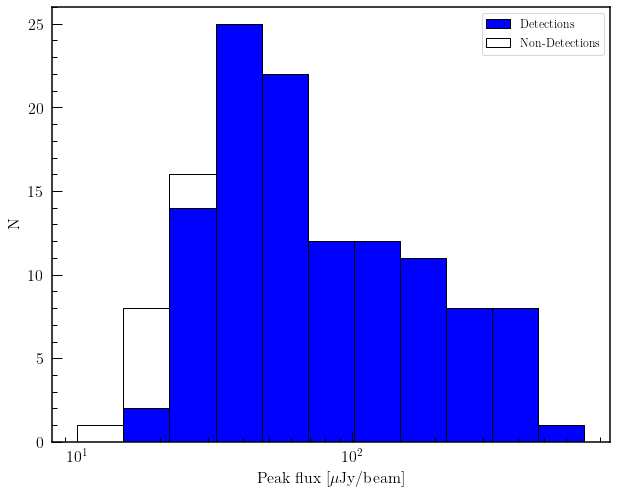

In [162]:
fig = plt.figure(figsize=(10,8))
plt.hist([pf[~nd], pf[nd]], color=["blue", "w"], edgecolor="k", histtype="barstacked", 
         bins=np.logspace(np.log10(10.0),np.log10(700.0), 12), label=["Detections", "Non-Detections"])

plt.xscale("log")
plt.ylim(0,26)
plt.legend(loc="best")
plt.xlabel("Peak flux [$\mu$Jy/beam]")
plt.ylabel("N")

Peak flux measurements and upper limits obtained for our sample

In [114]:
max(pf/pf_kell)

2.776923076923077

Median ratio = 0.6882382133995038


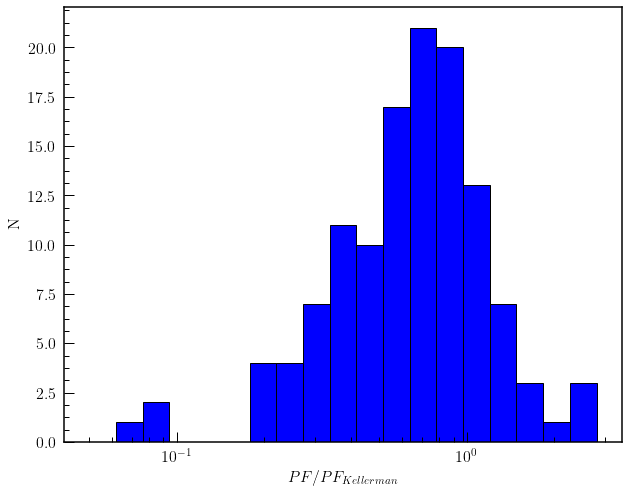

In [115]:
plt.figure(figsize=(10,8))
plt.hist(pf/pf_kell, histtype="barstacked", color="blue", edgecolor="k", bins=np.logspace(np.log10(.05),np.log10(2.8), 20))
plt.xscale("log")
plt.xlabel("$PF/PF_{Kellerman}$")
plt.ylabel("N")

print("Median ratio =", np.median(pf/pf_kell))

Histogram of the ratio of our measured peak flux (A-config; $\theta$ $\sim0.33''$) versus Kellerman+2016 measured peak flux (C-config; $\theta$ $\sim3.5''$)

Centered leftward of 1 --> can't attribute changes entirely to variability

Text(0, 0.5, 'Peak Flux - Ours [$\\mu$Jy/beam]')

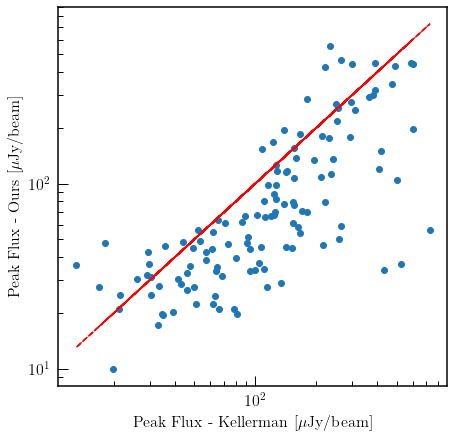

In [161]:
plt.scatter(pf_kell, pf)
plt.plot(pf_kell, pf_kell, '--r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Peak Flux - Kellerman [$\mu$Jy/beam]')
plt.ylabel('Peak Flux - Ours [$\mu$Jy/beam]')

Our peak flux measurements as a function of Kellerman peak flux measurements

Peak flux dropping from Kellerman doesn't appear to have any dependence on measured flux.  Although most clearly extended sources have higher flux densities

In [116]:
print(min(pf/pf_kell), max(pf/pf_kell))


0.06998087954110899 2.776923076923077


In [148]:
names = ["NAME", "RA", "DEC", "DELTA", "Z", "IF", "IF_ERR", "PF", "PF_ERR", "FRAC", "LOGL6", "mi", "Mi", "R"]
kell_data = pd.read_csv("Kellerman2016/KellermanQSOs.txt", sep=" ", names=names)


all_pf = kell_data[["PF"]].values.astype("float").flatten()
all_intf = kell_data[["IF"]].values.astype("float").flatten()

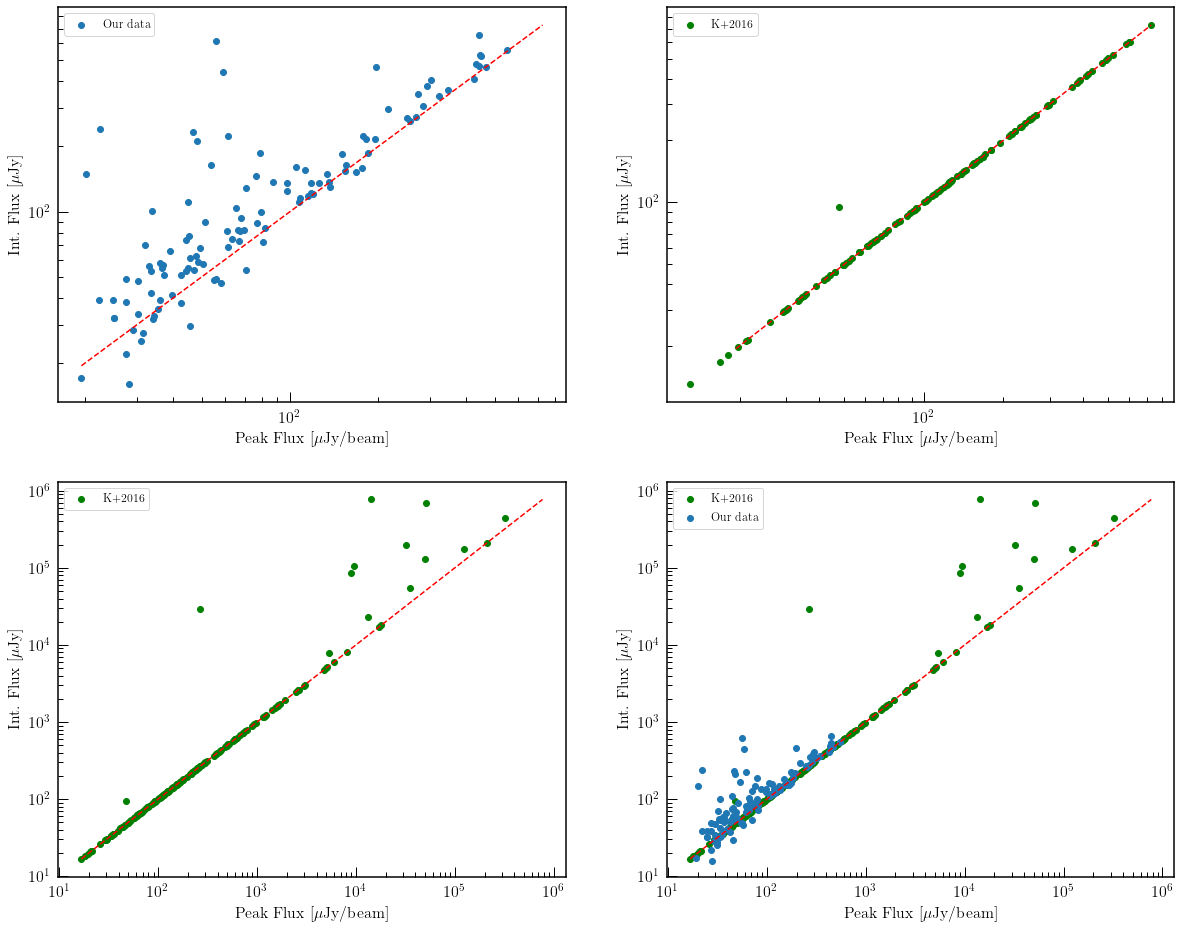

In [150]:
fig, ax = plt.subplots(2, 2, figsize=(20,16))
x = np.linspace(min(pf[~nd]), max(intf_kell), 50)
x2 = np.linspace(min(all_pf), max(all_intf), 50)

ax[0,0].scatter(pf[~nd], intf[~nd], label="Our data")
ax[0,0].plot(x, x, '--r')

ax[0,0].set_xlabel("Peak Flux [$\mu$Jy/beam]")
ax[0,0].set_ylabel("Int. Flux [$\mu$Jy]")

ax[0,0].set_yscale("log")
ax[0,0].set_xscale("log")
ax[0,0].legend(loc="best")

ax[0,1].scatter(pf_kell, intf_kell, color="g", label="K+2016")
ax[0,1].plot(x, x, '--r')

ax[0,1].set_xlabel("Peak Flux [$\mu$Jy/beam]")
ax[0,1].set_ylabel("Int. Flux [$\mu$Jy]")

ax[0,1].set_yscale("log")
ax[0,1].set_xscale("log")
ax[0,1].legend(loc="best")

ax[1,0].scatter(all_pf, all_intf, color="g", label="K+2016")
ax[1,0].plot(x2, x2, '--r')

ax[1,0].set_xlabel("Peak Flux [$\mu$Jy/beam]")
ax[1,0].set_ylabel("Int. Flux [$\mu$Jy]")

ax[1,0].set_yscale("log")
ax[1,0].set_xscale("log")
ax[1,0].legend(loc="best")

ax[1,1].scatter(all_pf, all_intf, color="g", label="K+2016")
ax[1,1].scatter(pf[~nd], intf[~nd], label="Our data")
ax[1,1].plot(x2, x2, '--r')

ax[1,1].set_xlabel("Peak Flux [$\mu$Jy/beam]")
ax[1,1].set_ylabel("Int. Flux [$\mu$Jy]")

ax[1,1].set_yscale("log")
ax[1,1].set_xscale("log")
ax[1,1].legend(loc="best")

Scatter plot with all our targets measured Int. Flux versus Peak Flux

* Upper-left: Many of our sources are now resolved; integrated flux generally higher than peak flux for all ranges of flux density measurements; very different from Kellerman observations on the right

* Upper-right: Virtually all of our targets as observed in Kellerman are unresolved; the one that is resolved based on this plot actually looks like it may just be two independent point sources (or could still be related) from A-config observations

* Lower-left: Int. flux versus Peak flux for entire RQ+RL Kellerman sample; see many more sources become resolved at higher flux densities

* Lower-right: See that our analysis shows that there are resolved sources across the entire sample; IF/PF still larger for more RL sources

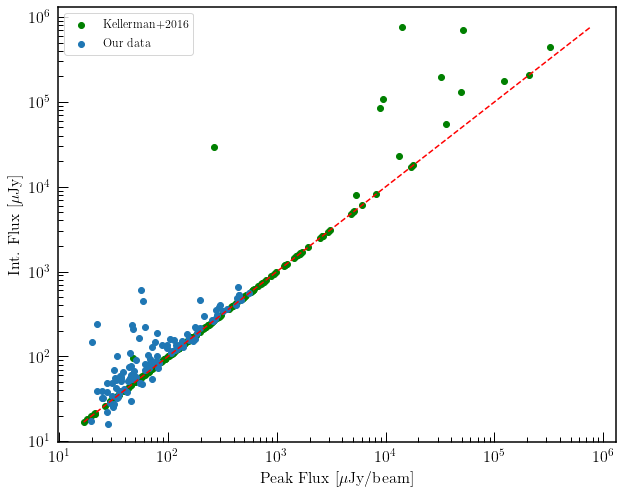

In [164]:
plt.figure(figsize=(10,8))

plt.scatter(all_pf, all_intf, color="g", label="Kellerman+2016")
plt.scatter(pf[~nd], intf[~nd], label="Our data")
plt.plot(x2, x2, '--r')

plt.xlabel("Peak Flux [$\mu$Jy/beam]")
plt.ylabel("Int. Flux [$\mu$Jy]")

plt.yscale("log")
plt.xscale("log")
plt.legend(loc="best")

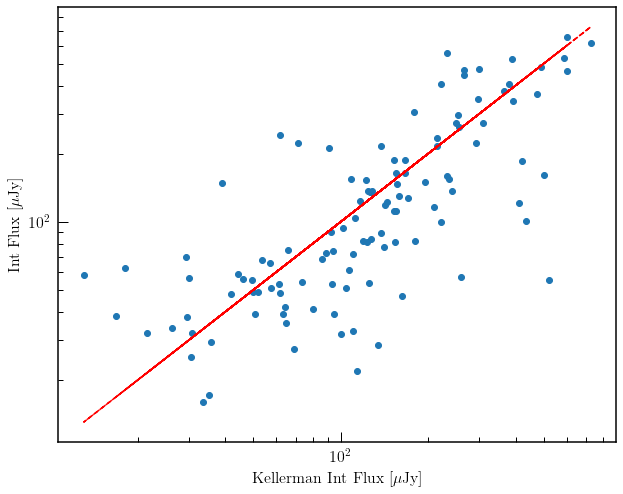

In [168]:
plt.figure(figsize=(10,8))
plt.scatter(intf_kell, intf)
plt.plot(intf_kell, intf_kell, '--r')
plt.xlabel("Kellerman Int Flux [$\mu$Jy]")
plt.ylabel("Int Flux [$\mu$Jy]")
plt.xscale("log")
plt.yscale("log")

Our total measured integrated flux as a function of measured Kellerman total flux -- how much emission is "resolved out"?

Median IF/IF_Kell = 0.8774193548387097


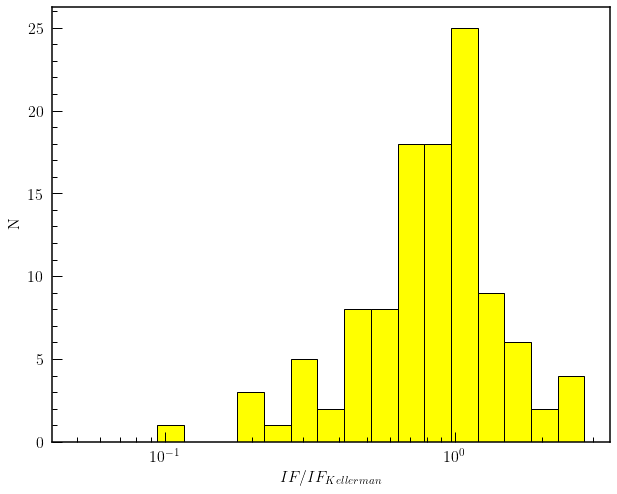

In [178]:
plt.figure(figsize=(10,8))
plt.hist(intf[~nd]/intf_kell[~nd], histtype="barstacked", color="yellow", edgecolor="k", bins=np.logspace(np.log10(.05),np.log10(2.8), 20))
plt.xscale("log")
plt.xlabel("$IF/IF_{Kellerman}$")
plt.ylabel("N")

print("Median IF/IF_Kell =", np.median(intf[~nd]/intf_kell[~nd]))

Slightly skewed left of 1 -- although worth noting that a few sources' integrsated fluxes have been calculated from AGN component only (and not summed with presumed SF contribution sources within Kellerman contour) -- so plot may shift slightly rightward